# Fitting models

In [2]:
from grizli import model
import numpy as np
import matplotlib.pyplot as plt
from sim_tools import *
from scipy.interpolate import interp1d
from astropy.table import Table
from astropy import wcs
from astropy.io import fits
from glob import glob
import seaborn as sea
import os

sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Create spectra object

In [3]:
wv,fl,er = np.load('galaxy_spec.npy')

sp = Gen_spec('beams/o195.0_21156.g102.A.fits', 1.248, wv, fl, er)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt

In [7]:
age = np.arange(1.0,6.5,0.5)

In [5]:
def Chi_Squared(data, model, error):
    return np.sum(((data-model) / error)**2)

In [8]:
chisq = np.zeros(age.size)
for i in range(age.size):
    mwv,mfl = np.load('model_spec/m0.019_a{0}_dt8.0_spec.npy'.format(age[i]))
    sp.Sim_spec(mwv,mfl)
    
    chisq[i] = Chi_Squared(sp.gal_fl, sp.fl, sp.gal_er)

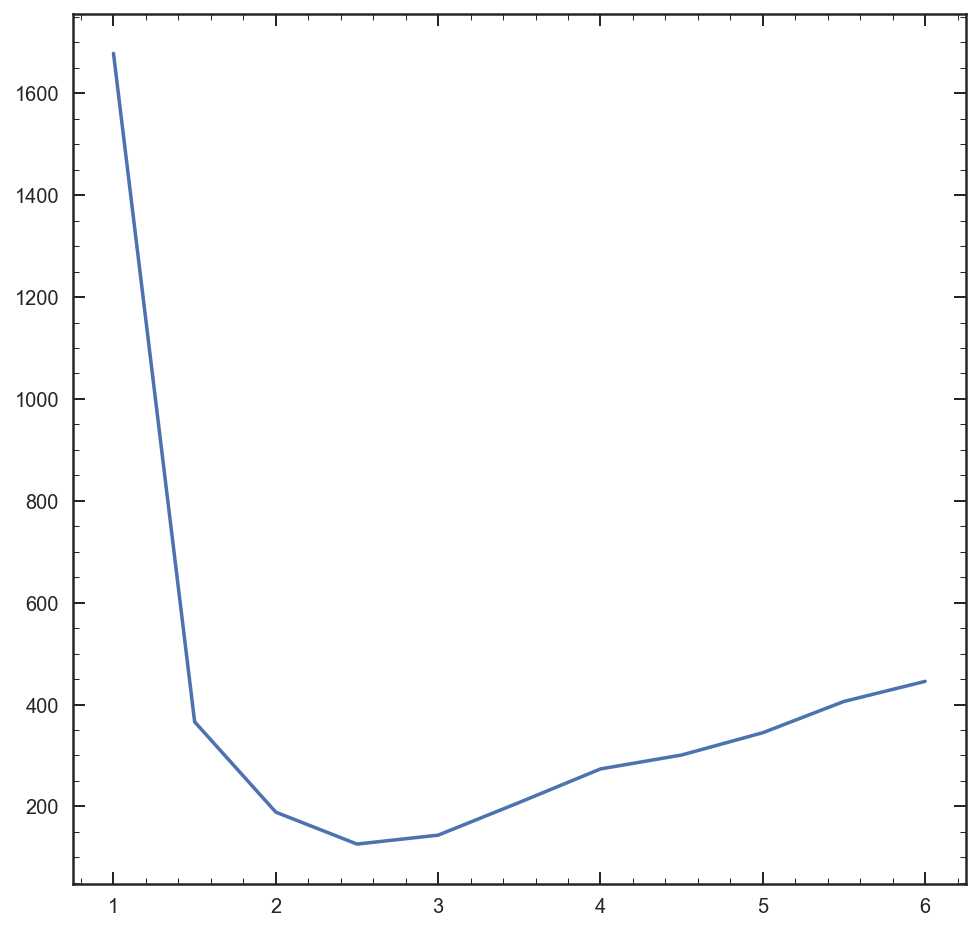

In [9]:
plt.figure(figsize=[8,8])
plt.plot(age,chisq)